In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib 

In [3]:
# read in "private_successful_matches.csv"
df = pd.read_csv("private_successful_matches.csv")
df

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched Score,Matched School,PSS_SCHOOL_ID,PSS_INST,...,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,PSS_ORIENT,PSS_COUNTY_NAME,Matched Address
0,ACADEMY OF MOUNT SAINT URSULA,330 BEDFORD PARK BLVD FL 1ST,10458.0,40.869088,-73.884837,0,95,ACADEMY OF MOUNT ST URSULA,00920855,ACADEMY OF MOUNT ST URSULA,...,5.19,63.66,26.98,2.76,0.0,1.38,15.62,1,BRONX,NaN
1,ACADEMY OF ST. DOROTHY,1305 HYLAN BOULEVARD,10305.0,40.597122,-74.085236,3,98,ACADEMY OF ST DOROTHY,00920174,ACADEMY OF ST DOROTHY,...,6.21,3.38,3.95,85.31,0.0,0.00,18.63,1,RICHMOND,NaN
2,AHI EZER YESHIVA,2433 OCEAN PARKWAY,11235.0,40.590242,-73.965316,4,95,AHI EZER YESHIVA SCHOOL,00936162,AHI EZER YESHIVA SCHOOL,...,0.00,0.00,0.00,100.00,0.0,0.00,8.68,18,KINGS,NaN
3,AL IMAN SCHOOL,8989 VAN WYCK EXPY,11435.0,40.700908,-73.815220,7,100,AL-IMAN SCHOOL,A9104867,AL-IMAN SCHOOL,...,77.77,0.00,2.77,11.11,0.0,8.33,5.90,17,QUEENS,NaN
4,AL-IHSAN ACADEMY,130-08 ROCKAWAY BOULEVARD,11420.0,40.674962,-73.808309,1,100,AL-IHSAN ACADEMY,A9300668,AL-IHSAN ACADEMY,...,77.77,0.00,4.96,17.25,0.0,0.00,11.13,17,QUEENS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,YESHIVAT LEV TORAH,3300 KINGS HIGHWAY,11234.0,40.618713,-73.942292,4,100,NaN,A9903303,ZVI DOV ROTH ACADEMY OF YESHIVA RAMBAM,...,0.00,0.00,0.00,100.00,0.0,0.00,6.32,18,KINGS,3300 KINGS HIGHWAY
497,YESHIVAT OHEL TORAH,2600 OCEAN AVENUE,11229.0,40.598150,-73.951186,2,94,NaN,00943737,BROOKLYN SEVENTH-DAY ADVENTIST SCHOOL,...,0.00,0.00,94.93,0.00,0.0,5.06,13.16,28,KINGS,1260 OCEAN AVENUE
498,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,A0902443,YESHIVA SHAARE TORAH,...,0.00,0.00,0.00,100.00,0.0,0.00,10.58,18,KINGS,1680 CONEY ISLAND AVENUE
499,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,BB161782,YESHIVA SHAARE TORAH,...,0.00,0.00,0.00,100.00,0.0,0.00,6.64,18,KINGS,1680 CONEY ISLAND AVENUE


In [4]:
# display all columns
pd.set_option('display.max_columns', None)
df

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched Score,Matched School,PSS_SCHOOL_ID,PSS_INST,LoGrade,HiGrade,PSS_ADDRESS,PSS_CITY,PSS_COUNTY_NO,PSS_COUNTY_FIPS,PSS_STABB,PSS_STATE_CODE,PSS_ZIP5,PSS_PHONE,DAYS PER SCHOOL YEAR,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_UG,PSS_ENROLL_PK,PSS_ENROLL_K,PSS_ENROLL_T,PSS_RACE_ AMERICAN_INDIAN,PSS_RACE_ASIAN/PACIFIC,PSS_RACE_HISPANIC,PSS_RACE_BLACK,PSS_RACE_WHITE,PSS_RACE_PACIFIC,PSS_RACE_MULTICULTURAL,PSS_FULLTIME_TEACH,PSS_COEDUCATION,PSS_LEVEL,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,PSS_ORIENT,PSS_COUNTY_NAME,Matched Address
0,ACADEMY OF MOUNT SAINT URSULA,330 BEDFORD PARK BLVD FL 1ST,10458.0,40.869088,-73.884837,0,95,ACADEMY OF MOUNT ST URSULA,00920855,ACADEMY OF MOUNT ST URSULA,14,17,330 BEDFORD PARK BOULEVARD,BRONX,36005,5,NY,36,10458,7183645353,181.0,7.00,Yes,NaN,NaN,NaN,289.0,0.0,15.0,184.0,78.0,8.0,0.0,4.0,18.5,2,2,1,0.00,5.19,63.66,26.98,2.76,0.0,1.38,15.62,1,BRONX,NaN
1,ACADEMY OF ST. DOROTHY,1305 HYLAN BOULEVARD,10305.0,40.597122,-74.085236,3,98,ACADEMY OF ST DOROTHY,00920174,ACADEMY OF ST DOROTHY,2,13,1305 HYLAN BOULEVARD,STATEN ISLAND,36085,85,NY,36,10305,7183510939,180.0,6.75,No,NaN,14.0,13.0,191.0,2.0,11.0,6.0,7.0,151.0,0.0,0.0,9.5,1,1,1,1.12,6.21,3.38,3.95,85.31,0.0,0.00,18.63,1,RICHMOND,NaN
2,AHI EZER YESHIVA,2433 OCEAN PARKWAY,11235.0,40.590242,-73.965316,4,95,AHI EZER YESHIVA SCHOOL,00936162,AHI EZER YESHIVA SCHOOL,2,13,2433 OCEAN PARKWAY,BROOKLYN,36047,47,NY,36,11235,7186486100,160.0,7.50,Yes,NaN,51.0,14.0,176.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,14.4,2,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,8.68,18,KINGS,NaN
3,AL IMAN SCHOOL,8989 VAN WYCK EXPY,11435.0,40.700908,-73.815220,7,100,AL-IMAN SCHOOL,A9104867,AL-IMAN SCHOOL,2,12,8989 VAN WYCK EXPY,JAMAICA,36081,81,NY,36,11435,7182976522,180.0,6.50,Yes,NaN,32.0,4.0,68.0,0.0,28.0,0.0,1.0,4.0,0.0,3.0,6.1,1,1,2,0.00,77.77,0.00,2.77,11.11,0.0,8.33,5.90,17,QUEENS,NaN
4,AL-IHSAN ACADEMY,130-08 ROCKAWAY BOULEVARD,11420.0,40.674962,-73.808309,1,100,AL-IHSAN ACADEMY,A9300668,AL-IHSAN ACADEMY,2,17,130-08 ROCKAWAY BOULEVARD,SOUTH OZONE PARK,36081,81,NY,36,11420,7183223154,182.0,7.25,Yes,NaN,40.0,35.0,463.0,0.0,329.0,0.0,21.0,73.0,0.0,0.0,38.0,1,3,2,0.00,77.77,0.00,4.96,17.25,0.0,0.00,11.13,17,QUEENS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,YESHIVAT LEV TORAH,3300 KINGS HIGHWAY,11234.0,40.618713,-73.942292,4,100,NaN,A9903303,ZVI DOV ROTH ACADEMY OF YESHIVA RAMBAM,14,17,3300 KINGS HIGHWAY,BROOKLYN,36047,47,NY,36,11234,7186775100,180.0,8.00,No,NaN,NaN,NaN,31.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,4.9,1,2,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.32,18,KINGS,3300 KINGS HIGHWAY
497,YESHIVAT OHEL TORAH,2600 OCEAN AVENUE,11229.0,40.598150,-73.951186,2,94,NaN,00943737,BROOKLYN SEVENTH-DAY ADVENTIST SCHOOL,2,13,1260 OCEAN AVENUE,BROOKLYN,36047,47,NY,36,11230,7188591313,182.0,6.75,Yes,NaN,10.0,5.0,89.0,0.0,0.0,0.0,75.0,0.0,0.0,4.0,6.0,1,1,2,0.00,0.00,0.00,94.93,0.00,0.0,5.06,13.16,28,KINGS,1260 OCEAN AVENUE
498,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,A0902443,YESHIVA SHAARE TORAH,3,13,1680 CONEY ISLAND AVENUE,BROOKLYN,36047,47,NY,36,11230,7183399752,135.0,9.50,No,NaN,NaN,28.0,199.0,0.0,0.0,0.0,0.0,199.0,0.0,0.0,18.8,3,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,10.58,18,KINGS,1680 CONEY ISLAND AVENUE
499,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,BB161782,YESHIVA SHAARE TORAH,2,17,1680 CONEY ISLAND AVENUE,BROOKLYN,36047,47,NY,36,11230,7186451196,180.0,8.00,Yes,NaN,124.0,74.0,854.0,0.0,0.0,0.0,0.0,730.0,0.0,0.0,109.9,1,3,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.64,18,KINGS,1680 CONEY ISLAND AVENUE


In [5]:
# add a column for "Jewish?": fill "1" if "PSS_ORIENT" == 18, otherwise fill "0"
df['Jewish'] = np.where(df['PSS_ORIENT'] == 18, 1, 0)
df

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched Score,Matched School,PSS_SCHOOL_ID,PSS_INST,LoGrade,HiGrade,PSS_ADDRESS,PSS_CITY,PSS_COUNTY_NO,PSS_COUNTY_FIPS,PSS_STABB,PSS_STATE_CODE,PSS_ZIP5,PSS_PHONE,DAYS PER SCHOOL YEAR,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_UG,PSS_ENROLL_PK,PSS_ENROLL_K,PSS_ENROLL_T,PSS_RACE_ AMERICAN_INDIAN,PSS_RACE_ASIAN/PACIFIC,PSS_RACE_HISPANIC,PSS_RACE_BLACK,PSS_RACE_WHITE,PSS_RACE_PACIFIC,PSS_RACE_MULTICULTURAL,PSS_FULLTIME_TEACH,PSS_COEDUCATION,PSS_LEVEL,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,PSS_ORIENT,PSS_COUNTY_NAME,Matched Address,Jewish
0,ACADEMY OF MOUNT SAINT URSULA,330 BEDFORD PARK BLVD FL 1ST,10458.0,40.869088,-73.884837,0,95,ACADEMY OF MOUNT ST URSULA,00920855,ACADEMY OF MOUNT ST URSULA,14,17,330 BEDFORD PARK BOULEVARD,BRONX,36005,5,NY,36,10458,7183645353,181.0,7.00,Yes,NaN,NaN,NaN,289.0,0.0,15.0,184.0,78.0,8.0,0.0,4.0,18.5,2,2,1,0.00,5.19,63.66,26.98,2.76,0.0,1.38,15.62,1,BRONX,NaN,0
1,ACADEMY OF ST. DOROTHY,1305 HYLAN BOULEVARD,10305.0,40.597122,-74.085236,3,98,ACADEMY OF ST DOROTHY,00920174,ACADEMY OF ST DOROTHY,2,13,1305 HYLAN BOULEVARD,STATEN ISLAND,36085,85,NY,36,10305,7183510939,180.0,6.75,No,NaN,14.0,13.0,191.0,2.0,11.0,6.0,7.0,151.0,0.0,0.0,9.5,1,1,1,1.12,6.21,3.38,3.95,85.31,0.0,0.00,18.63,1,RICHMOND,NaN,0
2,AHI EZER YESHIVA,2433 OCEAN PARKWAY,11235.0,40.590242,-73.965316,4,95,AHI EZER YESHIVA SCHOOL,00936162,AHI EZER YESHIVA SCHOOL,2,13,2433 OCEAN PARKWAY,BROOKLYN,36047,47,NY,36,11235,7186486100,160.0,7.50,Yes,NaN,51.0,14.0,176.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,14.4,2,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,8.68,18,KINGS,NaN,1
3,AL IMAN SCHOOL,8989 VAN WYCK EXPY,11435.0,40.700908,-73.815220,7,100,AL-IMAN SCHOOL,A9104867,AL-IMAN SCHOOL,2,12,8989 VAN WYCK EXPY,JAMAICA,36081,81,NY,36,11435,7182976522,180.0,6.50,Yes,NaN,32.0,4.0,68.0,0.0,28.0,0.0,1.0,4.0,0.0,3.0,6.1,1,1,2,0.00,77.77,0.00,2.77,11.11,0.0,8.33,5.90,17,QUEENS,NaN,0
4,AL-IHSAN ACADEMY,130-08 ROCKAWAY BOULEVARD,11420.0,40.674962,-73.808309,1,100,AL-IHSAN ACADEMY,A9300668,AL-IHSAN ACADEMY,2,17,130-08 ROCKAWAY BOULEVARD,SOUTH OZONE PARK,36081,81,NY,36,11420,7183223154,182.0,7.25,Yes,NaN,40.0,35.0,463.0,0.0,329.0,0.0,21.0,73.0,0.0,0.0,38.0,1,3,2,0.00,77.77,0.00,4.96,17.25,0.0,0.00,11.13,17,QUEENS,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,YESHIVAT LEV TORAH,3300 KINGS HIGHWAY,11234.0,40.618713,-73.942292,4,100,NaN,A9903303,ZVI DOV ROTH ACADEMY OF YESHIVA RAMBAM,14,17,3300 KINGS HIGHWAY,BROOKLYN,36047,47,NY,36,11234,7186775100,180.0,8.00,No,NaN,NaN,NaN,31.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,4.9,1,2,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.32,18,KINGS,3300 KINGS HIGHWAY,1
497,YESHIVAT OHEL TORAH,2600 OCEAN AVENUE,11229.0,40.598150,-73.951186,2,94,NaN,00943737,BROOKLYN SEVENTH-DAY ADVENTIST SCHOOL,2,13,1260 OCEAN AVENUE,BROOKLYN,36047,47,NY,36,11230,7188591313,182.0,6.75,Yes,NaN,10.0,5.0,89.0,0.0,0.0,0.0,75.0,0.0,0.0,4.0,6.0,1,1,2,0.00,0.00,0.00,94.93,0.00,0.0,5.06,13.16,28,KINGS,1260 OCEAN AVENUE,0
498,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,A0902443,YESHIVA SHAARE TORAH,3,13,1680 CONEY ISLAND AVENUE,BROOKLYN,36047,47,NY,36,11230,7183399752,135.0,9.50,No,NaN,NaN,28.0,199.0,0.0,0.0,0.0,0.0,199.0,0.0,0.0,18.8,3,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,10.58,18,KINGS,1680 CONEY ISLAND AVENUE,1
499,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,BB161782,YESHIVA SHAARE TORAH,2,17,1680 CONEY ISLAND AVENUE,BROOKLYN,36047,47,NY,36,11230,7186451196,180.0,8.00,Yes,NaN,124.0,74.0,854.0,0.0,0.0,0.0,0.0,730.0,0.0,0.0,109.9,1,3,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.64,18,KINGS,1680 CONEY ISLAND AVENUE,1


In [6]:
# add a column for "Religious?": fill "0" if "PSS_RELIG" == 3, otherwise fill "1"
df['Religious'] = np.where(df['PSS_RELIG'] == 3, 0, 1)
df

,SchoolName,Address,ZipCode,LATITUDE,LONGITUDE,COUNTA of Level,Matched Score,Matched School,PSS_SCHOOL_ID,PSS_INST,LoGrade,HiGrade,PSS_ADDRESS,PSS_CITY,PSS_COUNTY_NO,PSS_COUNTY_FIPS,PSS_STABB,PSS_STATE_CODE,PSS_ZIP5,PSS_PHONE,DAYS PER SCHOOL YEAR,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_UG,PSS_ENROLL_PK,PSS_ENROLL_K,PSS_ENROLL_T,PSS_RACE_ AMERICAN_INDIAN,PSS_RACE_ASIAN/PACIFIC,PSS_RACE_HISPANIC,PSS_RACE_BLACK,PSS_RACE_WHITE,PSS_RACE_PACIFIC,PSS_RACE_MULTICULTURAL,PSS_FULLTIME_TEACH,PSS_COEDUCATION,PSS_LEVEL,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,PSS_ORIENT,PSS_COUNTY_NAME,Matched Address,Jewish,Religious
0,ACADEMY OF MOUNT SAINT URSULA,330 BEDFORD PARK BLVD FL 1ST,10458.0,40.869088,-73.884837,0,95,ACADEMY OF MOUNT ST URSULA,00920855,ACADEMY OF MOUNT ST URSULA,14,17,330 BEDFORD PARK BOULEVARD,BRONX,36005,5,NY,36,10458,7183645353,181.0,7.00,Yes,NaN,NaN,NaN,289.0,0.0,15.0,184.0,78.0,8.0,0.0,4.0,18.5,2,2,1,0.00,5.19,63.66,26.98,2.76,0.0,1.38,15.62,1,BRONX,NaN,0,1
1,ACADEMY OF ST. DOROTHY,1305 HYLAN BOULEVARD,10305.0,40.597122,-74.085236,3,98,ACADEMY OF ST DOROTHY,00920174,ACADEMY OF ST DOROTHY,2,13,1305 HYLAN BOULEVARD,STATEN ISLAND,36085,85,NY,36,10305,7183510939,180.0,6.75,No,NaN,14.0,13.0,191.0,2.0,11.0,6.0,7.0,151.0,0.0,0.0,9.5,1,1,1,1.12,6.21,3.38,3.95,85.31,0.0,0.00,18.63,1,RICHMOND,NaN,0,1
2,AHI EZER YESHIVA,2433 OCEAN PARKWAY,11235.0,40.590242,-73.965316,4,95,AHI EZER YESHIVA SCHOOL,00936162,AHI EZER YESHIVA SCHOOL,2,13,2433 OCEAN PARKWAY,BROOKLYN,36047,47,NY,36,11235,7186486100,160.0,7.50,Yes,NaN,51.0,14.0,176.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,14.4,2,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,8.68,18,KINGS,NaN,1,1
3,AL IMAN SCHOOL,8989 VAN WYCK EXPY,11435.0,40.700908,-73.815220,7,100,AL-IMAN SCHOOL,A9104867,AL-IMAN SCHOOL,2,12,8989 VAN WYCK EXPY,JAMAICA,36081,81,NY,36,11435,7182976522,180.0,6.50,Yes,NaN,32.0,4.0,68.0,0.0,28.0,0.0,1.0,4.0,0.0,3.0,6.1,1,1,2,0.00,77.77,0.00,2.77,11.11,0.0,8.33,5.90,17,QUEENS,NaN,0,1
4,AL-IHSAN ACADEMY,130-08 ROCKAWAY BOULEVARD,11420.0,40.674962,-73.808309,1,100,AL-IHSAN ACADEMY,A9300668,AL-IHSAN ACADEMY,2,17,130-08 ROCKAWAY BOULEVARD,SOUTH OZONE PARK,36081,81,NY,36,11420,7183223154,182.0,7.25,Yes,NaN,40.0,35.0,463.0,0.0,329.0,0.0,21.0,73.0,0.0,0.0,38.0,1,3,2,0.00,77.77,0.00,4.96,17.25,0.0,0.00,11.13,17,QUEENS,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,YESHIVAT LEV TORAH,3300 KINGS HIGHWAY,11234.0,40.618713,-73.942292,4,100,NaN,A9903303,ZVI DOV ROTH ACADEMY OF YESHIVA RAMBAM,14,17,3300 KINGS HIGHWAY,BROOKLYN,36047,47,NY,36,11234,7186775100,180.0,8.00,No,NaN,NaN,NaN,31.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,4.9,1,2,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.32,18,KINGS,3300 KINGS HIGHWAY,1,1
497,YESHIVAT OHEL TORAH,2600 OCEAN AVENUE,11229.0,40.598150,-73.951186,2,94,NaN,00943737,BROOKLYN SEVENTH-DAY ADVENTIST SCHOOL,2,13,1260 OCEAN AVENUE,BROOKLYN,36047,47,NY,36,11230,7188591313,182.0,6.75,Yes,NaN,10.0,5.0,89.0,0.0,0.0,0.0,75.0,0.0,0.0,4.0,6.0,1,1,2,0.00,0.00,0.00,94.93,0.00,0.0,5.06,13.16,28,KINGS,1260 OCEAN AVENUE,0,1
498,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,A0902443,YESHIVA SHAARE TORAH,3,13,1680 CONEY ISLAND AVENUE,BROOKLYN,36047,47,NY,36,11230,7183399752,135.0,9.50,No,NaN,NaN,28.0,199.0,0.0,0.0,0.0,0.0,199.0,0.0,0.0,18.8,3,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,10.58,18,KINGS,1680 CONEY ISLAND AVENUE,1,1
499,YESHIVAT SHAARE TORAH,1680 CONEY ISLAND AVENUE,11230.0,40.616477,-73.963617,5,100,NaN,BB161782,YESHIVA SHAARE TORAH,2,17,1680 CONEY ISLAND AVENUE,BROOKLYN,36047,47,NY,36,11230,7186451196,180.0,8.00,Yes,NaN,124.0,74.0,854.0,0.0,0.0,0.0,0.0,730.0,0.0,0.0,109.9,1,3,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.64,18,KINGS,1680 CONEY ISLAND AVENUE,1,1


## Clean up the columns and data

In [7]:
# create df2 and only keep theses columns: "COUNTA of Level", DAY HOURS, PSS_LIBRARY, PSS_ENROLL_T, PSS_COEDUCATION, PSS_RELIG	PSS_INDIAN_PCT	PSS_ASIAN_PCT	PSS_HISP_PCT	PSS_BLACK_PCT	PSS_WHITE_PCT	PSS_PACISL_PCT	PSS_TWOMORE_PCT	PSS_STUDENT_TEACHER_RATIO, Jewish? , Religious?
df2 = df[['COUNTA of Level', 'DAY HOURS', 'PSS_LIBRARY', 'PSS_ENROLL_T', 'PSS_COEDUCATION', 'PSS_RELIG', 'PSS_INDIAN_PCT', 'PSS_ASIAN_PCT', 'PSS_HISP_PCT', 'PSS_BLACK_PCT', 'PSS_WHITE_PCT', 'PSS_PACISL_PCT', 'PSS_TWOMORE_PCT', 'PSS_STUDENT_TEACHER_RATIO', 'Jewish', 'Religious']]
df2


,COUNTA of Level,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_T,PSS_COEDUCATION,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,Jewish,Religious
0,0,7.00,Yes,289.0,2,1,0.00,5.19,63.66,26.98,2.76,0.0,1.38,15.62,0,1
1,3,6.75,No,191.0,1,1,1.12,6.21,3.38,3.95,85.31,0.0,0.00,18.63,0,1
2,4,7.50,Yes,176.0,2,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,8.68,1,1
3,7,6.50,Yes,68.0,1,2,0.00,77.77,0.00,2.77,11.11,0.0,8.33,5.90,0,1
4,1,7.25,Yes,463.0,1,2,0.00,77.77,0.00,4.96,17.25,0.0,0.00,11.13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,4,8.00,No,31.0,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.32,1,1
497,2,6.75,Yes,89.0,1,2,0.00,0.00,0.00,94.93,0.00,0.0,5.06,13.16,0,1
498,5,9.50,No,199.0,3,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,10.58,1,1
499,5,8.00,Yes,854.0,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.64,1,1


In [8]:
# in column "PSS_LIBRARY", replace "Yes" with "1" and "No" with "0"
df2['PSS_LIBRARY'] = df2['PSS_LIBRARY'].replace('Yes', 1)
df2['PSS_LIBRARY'] = df2['PSS_LIBRARY'].replace('No', 0)
df2

/var/folders/82/dd5bh8c53fn11t7t8bjlnk700000gn/T/ipykernel_79080/4219517225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PSS_LIBRARY'] = df2['PSS_LIBRARY'].replace('Yes', 1)
/var/folders/82/dd5bh8c53fn11t7t8bjlnk700000gn/T/ipykernel_79080/4219517225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PSS_LIBRARY'] = df2['PSS_LIBRARY'].replace('No', 0)


,COUNTA of Level,DAY HOURS,PSS_LIBRARY,PSS_ENROLL_T,PSS_COEDUCATION,PSS_RELIG,PSS_INDIAN_PCT,PSS_ASIAN_PCT,PSS_HISP_PCT,PSS_BLACK_PCT,PSS_WHITE_PCT,PSS_PACISL_PCT,PSS_TWOMORE_PCT,PSS_STUDENT_TEACHER_RATIO,Jewish,Religious
0,0,7.00,1.0,289.0,2,1,0.00,5.19,63.66,26.98,2.76,0.0,1.38,15.62,0,1
1,3,6.75,0.0,191.0,1,1,1.12,6.21,3.38,3.95,85.31,0.0,0.00,18.63,0,1
2,4,7.50,1.0,176.0,2,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,8.68,1,1
3,7,6.50,1.0,68.0,1,2,0.00,77.77,0.00,2.77,11.11,0.0,8.33,5.90,0,1
4,1,7.25,1.0,463.0,1,2,0.00,77.77,0.00,4.96,17.25,0.0,0.00,11.13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,4,8.00,0.0,31.0,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.32,1,1
497,2,6.75,1.0,89.0,1,2,0.00,0.00,0.00,94.93,0.00,0.0,5.06,13.16,0,1
498,5,9.50,0.0,199.0,3,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,10.58,1,1
499,5,8.00,1.0,854.0,1,2,0.00,0.00,0.00,0.00,100.00,0.0,0.00,6.64,1,1


In [9]:
# save to csv called "private_successful_matches_cleaned.csv"
df2.to_csv("private_successful_matches_cleaned.csv", index=False)

In [51]:
# set up R
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [53]:
%%R

# My commonly used R imports

require('tidyverse')

In [54]:
%%R
# read in "private_successful_matches_cleaned.csv" into R dataframe called "df2"
df2 <- read.csv("private_successful_matches_cleaned.csv")
df2

    COUNTA.of.Level DAY.HOURS PSS_LIBRARY PSS_ENROLL_T PSS_COEDUCATION
1                 0      7.00           1          289               2
2                 3      6.75           0          191               1
3                 4      7.50           1          176               2
4                 7      6.50           1           68               1
5                 1      7.25           1          463               1
6                 5      8.00           1          812               1
7                 1      6.75           0          255               1
8                 1      7.66           1          568               1
9                 2      7.56           1          415               3
10                2      6.16           1         1506               1
11                4      7.00           1           22               1
12                2      7.50           1          530               2
13                4      9.50           1          300               2
14    

In [55]:
%%R
# conduct a simple anaylsis of the data
summary(df2)


 COUNTA.of.Level   DAY.HOURS       PSS_LIBRARY      PSS_ENROLL_T   
 Min.   :0.000   Min.   : 5.000   Min.   :0.0000   Min.   :  22.0  
 1st Qu.:1.000   1st Qu.: 6.500   1st Qu.:0.0000   1st Qu.: 176.2  
 Median :2.000   Median : 7.000   Median :1.0000   Median : 320.5  
 Mean   :2.214   Mean   : 7.287   Mean   :0.6953   Mean   : 465.1  
 3rd Qu.:4.000   3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.: 592.5  
 Max.   :7.000   Max.   :10.980   Max.   :1.0000   Max.   :2522.0  
                 NA's   :6        NA's   :12       NA's   :3       
 PSS_COEDUCATION    PSS_RELIG     PSS_INDIAN_PCT    PSS_ASIAN_PCT   
 Min.   :-1.000   Min.   :1.000   Min.   :0.00000   Min.   : 0.000  
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:0.00000   1st Qu.: 0.000  
 Median : 1.000   Median :2.000   Median :0.00000   Median : 1.110  
 Mean   : 1.559   Mean   :1.892   Mean   :0.08908   Mean   : 7.234  
 3rd Qu.: 2.000   3rd Qu.:2.000   3rd Qu.:0.00000   3rd Qu.: 6.662  
 Max.   : 3.000   Max.   :3.000   Max.   :

In [58]:
%%R

# conduct a t-test of "COUNTA.of.Level" on "Jewish" = 0 vs "Jewish" = 1
# corrected to avoid the parser error
t.test(df2$`COUNTA.of.Level` ~ df2$Jewish)





	Welch Two Sample t-test

data:  df2$COUNTA.of.Level by df2$Jewish
t = -7.5384, df = 329.61, p-value = 4.647e-13
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -1.4672274 -0.8599371
sample estimates:
mean in group 0 mean in group 1 
       1.830357        2.993939 



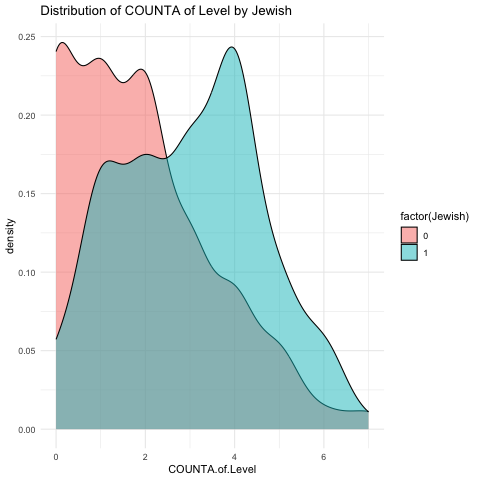

In [59]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Jewish"
df2 %>%
    ggplot(aes(x = `COUNTA.of.Level`, fill = factor(Jewish))) +
    geom_density(alpha = 0.5) +
    labs(title = "Distribution of COUNTA of Level by Jewish") +
    theme_minimal()

In [65]:
%%R
# turn "PSS_STUDENT_TEACHER_RATIO" into continuous variable
df2$PSS_STUDENT_TEACHER_RATIO <- as.numeric(df2$PSS_STUDENT_TEACHER_RATIO)
                                            



R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`). 



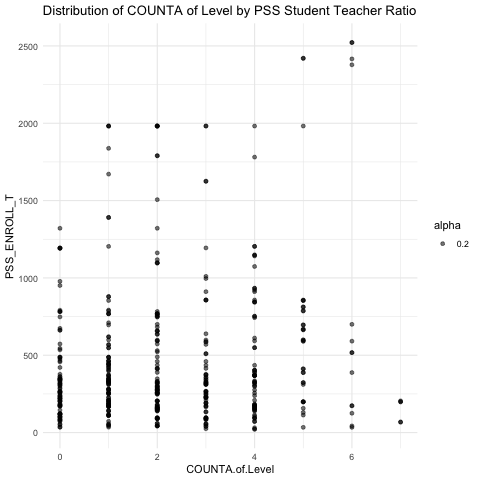

In [71]:
%%R
# plot the distribution of "COUNTA.of.Level" by "PSS_STUDENT_TEACHER_RATIO"
df2 %>%
    ggplot(aes(x = `COUNTA.of.Level`, y = PSS_ENROLL_T)) +
    geom_point(aes(alpha=.2)) +
    labs(title = "Distribution of COUNTA of Level by PSS Student Teacher Ratio") +
    theme_minimal()

In [60]:
%%R

# conduct a t-test of "COUNTA.of.Level" on "Religious" = 0 vs "Jewish" = 1
# corrected to avoid the parser error
t.test(df2$`COUNTA.of.Level` ~ df2$Religious)





	Welch Two Sample t-test

data:  df2$COUNTA.of.Level by df2$Religious
t = -5.1761, df = 189.2, p-value = 5.758e-07
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -1.2305896 -0.5514611
sample estimates:
mean in group 0 mean in group 1 
       1.518182        2.409207 



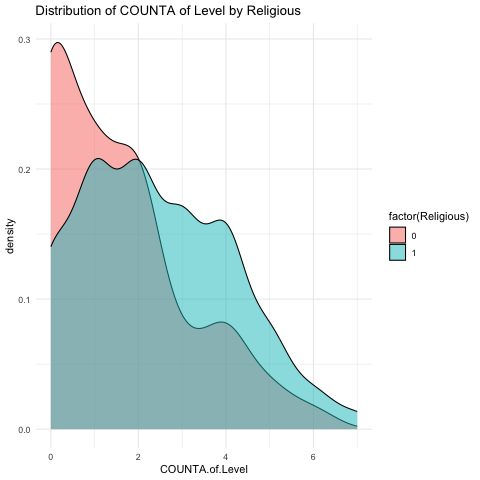

In [61]:
%%R
# plot the distribution of "COUNTA.of.Level" by "Religious"
df2 %>%
    ggplot(aes(x = `COUNTA.of.Level`, fill = factor(Religious))) +
    geom_density(alpha = 0.5) +
    labs(title = "Distribution of COUNTA of Level by Religious") +
    theme_minimal()

In [77]:
%%R
# conduct a multiple regression of "COUNTA of Level" on "Jewish", and "Religious"
# corrected to avoid the parser error
summary(lm(`COUNTA.of.Level` ~ Jewish + Religious, data = df2))


Call:
lm(formula = COUNTA.of.Level ~ Jewish + Religious, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9939 -0.9939  0.0061  1.0061  5.0177 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5182     0.1547   9.816  < 2e-16 ***
Jewish        1.0116     0.1661   6.090 2.25e-09 ***
Religious     0.4641     0.1886   2.461   0.0142 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.622 on 498 degrees of freedom
Multiple R-squared:  0.1123,	Adjusted R-squared:  0.1087 
F-statistic:  31.5 on 2 and 498 DF,  p-value: 1.316e-13



In [81]:
%%R
# conduct a multiple regression of "COUNTA of Level" on "Jewish", and "Religious", and "PSS_STUDENT_TEACHER_RATIO"
# corrected to avoid the parser error
summary(lm(`COUNTA.of.Level` ~ Jewish + Religious + PSS_COEDUCATION, data = df2))


Call:
lm(formula = COUNTA.of.Level ~ Jewish + Religious + PSS_COEDUCATION, 
    data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1113 -1.2711 -0.1113  1.0544  5.0544 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.3288     0.2050   6.481 2.20e-10 ***
Jewish            0.8402     0.2060   4.080 5.25e-05 ***
Religious         0.4540     0.1885   2.408   0.0164 *  
PSS_COEDUCATION   0.1628     0.1158   1.405   0.1606    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.621 on 497 degrees of freedom
Multiple R-squared:  0.1158,	Adjusted R-squared:  0.1105 
F-statistic:  21.7 on 3 and 497 DF,  p-value: 3.209e-13



In [82]:
%%R
# conduct a multiple regression of "COUNTA of Level" on "Jewish", and "Religious", and "PSS_STUDENT_TEACHER_RATIO"
# corrected to avoid the parser error
summary(lm(`COUNTA.of.Level` ~ Jewish + Religious + PSS_COEDUCATION + PSS_WHITE_PCT, data = df2))


Call:
lm(formula = COUNTA.of.Level ~ Jewish + Religious + PSS_COEDUCATION + 
    PSS_WHITE_PCT, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0902 -1.0922 -0.0902  1.0323  5.1887 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.125289   0.249484   4.510 8.15e-06 ***
Jewish          0.384884   0.292645   1.315   0.1891    
Religious       0.482382   0.203090   2.375   0.0179 *  
PSS_COEDUCATION 0.122463   0.120669   1.015   0.3107    
PSS_WHITE_PCT   0.007302   0.003109   2.349   0.0192 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.619 on 478 degrees of freedom
  (因為不存在，18 個觀察量被刪除了)
Multiple R-squared:  0.1182,	Adjusted R-squared:  0.1108 
F-statistic: 16.01 on 4 and 478 DF,  p-value: 2.596e-12

